In [1]:
# Loading libraries

import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab
import matplotlib
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_control = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/control_20yr.nc')
data_pole_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_90_n_20yr.nc')
data_85_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_85_n_20yr.nc')
data_80_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_80_n_20yr.nc')
data_75_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_75_n_20yr.nc')
data_70_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_70_n_20yr.nc')
data_65_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_65_n_20yr.nc')
data_60_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_60_n_20yr.nc')
data_55_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_55_n_20yr.nc')
data_50_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_50_n_20yr.nc')
data_45_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_45_n_20yr.nc')
data_40_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_40_n_20yr.nc')
data_35_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_35_n_20yr.nc')
data_30_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_30_n_20yr.nc')
data_25_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_25_n_20yr.nc')
data_20_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_20_n_20yr.nc')
data_15_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_15_n_20yr.nc')
data_10_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_10_n_20yr.nc')
data_05_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_05_n_20yr.nc')
data_00 = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_00_20yr.nc')

# SST Check

In [4]:
SST_n = data_45_n.TS.mean('lon') - data_control.TS.mean('lon')
SST_s = SST_n.assign_coords(lat=list(reversed(data_15_n.lat)))
SST_sym = SST_n + SST_s

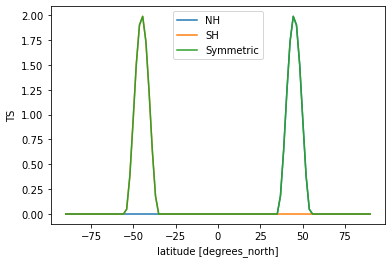

In [6]:
SST_n.plot(label='NH')
SST_s.plot(label='SH')
SST_sym.plot(label='Symmetric')
plt.legend()

# Radiation global average calculation

In [7]:
# Weights

weights = np.cos(np.deg2rad(data_control.lat))
weights.name='weights'
weights

<xarray.DataArray 'weights' (lat: 96)>
array([6.12323400e-17, 3.30633693e-02, 6.60905843e-02, 9.90455303e-02,
       1.31892171e-01, 1.64594590e-01, 1.97117027e-01, 2.29423920e-01,
       2.61479941e-01, 2.93250037e-01, 3.24699469e-01, 3.55793847e-01,
       3.86499169e-01, 4.16781860e-01, 4.46608807e-01, 4.75947393e-01,
       5.04765538e-01, 5.33031729e-01, 5.60715057e-01, 5.87785252e-01,
       6.14212713e-01, 6.39968541e-01, 6.65024572e-01, 6.89353409e-01,
       7.12928448e-01, 7.35723911e-01, 7.57714870e-01, 7.78877279e-01,
       7.99187997e-01, 8.18624815e-01, 8.37166478e-01, 8.54792713e-01,
       8.71484244e-01, 8.87222819e-01, 9.01991230e-01, 9.15773327e-01,
       9.28554038e-01, 9.40319390e-01, 9.51056516e-01, 9.60753676e-01,
       9.69400266e-01, 9.76986831e-01, 9.83505075e-01, 9.88947871e-01,
       9.93309266e-01, 9.96584493e-01, 9.98769969e-01, 9.99863305e-01,
       9.99863305e-01, 9.98769969e-01, 9.96584493e-01, 9.93309266e-01,
       9.88947871e-01, 9.83505075e-01, 9.76986831e-01, 9.69400266e-01,
       9.60753676e-01, 9.51056516e-01, 9.40319390e-01, 9.28554038e-01,
       9.15773327e-01, 9.01991230e-01, 8.87222819e-01, 8.71484244e-01,
       8.54792713e-01, 8.37166478e-01, 8.18624815e-01, 7.99187997e-01,
       7.78877279e-01, 7.57714870e-01, 7.35723911e-01, 7.12928448e-01,
       6.89353409e-01, 6.65024572e-01, 6.39968541e-01, 6.14212713e-01,
       5.87785252e-01, 5.60715057e-01, 5.33031729e-01, 5.04765538e-01,
       4.75947393e-01, 4.46608807e-01, 4.16781860e-01, 3.86499169e-01,
       3.55793847e-01, 3.24699469e-01, 2.93250037e-01, 2.61479941e-01,
       2.29423920e-01, 1.97117027e-01, 1.64594590e-01, 1.31892171e-01,
       9.90455303e-02, 6.60905843e-02, 3.30633693e-02, 6.12323400e-17])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [10]:
test = data_control.FSNT.weighted(weights).mean(('lat','lon'))
test

<xarray.DataArray 'FSNT' ()>
array(239.89912489)

In [12]:
# All Sky

#Control
control_Rw = data_control.FSNT.mean('lon') - data_control.FLNT.mean('lon')
control_Rw.load()

toa_00 = data_00.FSNT.mean('lon') - data_00.FLNT.mean('lon') - control_Rw
toa_00.load()

toa_05_n = data_05_n.FSNT.mean('lon') - data_05_n.FLNT.mean('lon') - control_Rw
toa_05_s = toa_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
toa_05 = toa_05_n + toa_05_s
toa_05.load()

toa_10_n = data_10_n.FSNT.mean('lon') - data_10_n.FLNT.mean('lon') - control_Rw
toa_10_s = toa_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))
toa_10 = toa_10_n + toa_10_s
toa_10.load()

toa_15_n = data_15_n.FSNT.mean('lon') - data_15_n.FLNT.mean('lon') - control_Rw
toa_15_s = toa_15_n.assign_coords(lat=list(reversed(data_15_n.lat)))
toa_15 = toa_15_n + toa_15_s
toa_15.load()

toa_20_n = data_20_n.FSNT.mean('lon') - data_20_n.FLNT.mean('lon') - control_Rw
toa_20_s = toa_20_n.assign_coords(lat=list(reversed(data_20_n.lat)))
toa_20 = toa_20_n + toa_20_s
toa_20.load()

toa_25_n = data_25_n.FSNT.mean('lon') - data_25_n.FLNT.mean('lon') - control_Rw
toa_25_s = toa_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
toa_25 = toa_25_n + toa_25_s
toa_25.load()

toa_30_n = data_30_n.FSNT.mean('lon') - data_30_n.FLNT.mean('lon') - control_Rw
toa_30_s = toa_30_n.assign_coords(lat=list(reversed(data_30_n.lat)))
toa_30 = toa_30_n + toa_30_s
toa_30.load()

toa_35_n = data_35_n.FSNT.mean('lon') - data_35_n.FLNT.mean('lon') - control_Rw
toa_35_s = toa_35_n.assign_coords(lat=list(reversed(data_35_n.lat)))
toa_35 = toa_35_n + toa_35_s
toa_35.load()

toa_40_n = data_40_n.FSNT.mean('lon') - data_40_n.FLNT.mean('lon') - control_Rw
toa_40_s = toa_40_n.assign_coords(lat=list(reversed(data_40_n.lat)))
toa_40 = toa_40_n + toa_40_s
toa_40.load()

toa_45_n = data_45_n.FSNT.mean('lon') - data_45_n.FLNT.mean('lon') - control_Rw
toa_45_s = toa_45_n.assign_coords(lat=list(reversed(data_45_n.lat)))
toa_45 = toa_45_n + toa_45_s
toa_45.load()

toa_50_n = data_50_n.FSNT.mean('lon') - data_50_n.FLNT.mean('lon') - control_Rw
toa_50_s = toa_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
toa_50 = toa_50_n + toa_50_s
toa_50.load()

toa_55_n = data_55_n.FSNT.mean('lon') - data_55_n.FLNT.mean('lon') - control_Rw
toa_55_s = toa_55_n.assign_coords(lat=list(reversed(data_55_n.lat)))
toa_55 = toa_55_n + toa_55_s
toa_55.load()

toa_60_n = data_60_n.FSNT.mean('lon') - data_60_n.FLNT.mean('lon') - control_Rw
toa_60_s = toa_60_n.assign_coords(lat=list(reversed(data_60_n.lat)))
toa_60 = toa_60_n + toa_60_s
toa_60.load()

toa_65_n = data_65_n.FSNT.mean('lon') - data_65_n.FLNT.mean('lon') - control_Rw
toa_65_s = toa_65_n.assign_coords(lat=list(reversed(data_65_n.lat)))
toa_65 = toa_65_n + toa_65_s
toa_65.load()

toa_70_n = data_70_n.FSNT.mean('lon') - data_70_n.FLNT.mean('lon') - control_Rw
toa_70_s = toa_70_n.assign_coords(lat=list(reversed(data_70_n.lat)))
toa_70 = toa_70_n + toa_70_s
toa_70.load()

toa_75_n = data_75_n.FSNT.mean('lon') - data_75_n.FLNT.mean('lon') - control_Rw
toa_75_s = toa_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
toa_75 = toa_75_n + toa_75_s
toa_75.load()

toa_80_n = data_80_n.FSNT.mean('lon') - data_80_n.FLNT.mean('lon') - control_Rw
toa_80_s = toa_80_n.assign_coords(lat=list(reversed(data_80_n.lat)))
toa_80 = toa_80_n + toa_80_s
toa_80.load()

toa_85_n = data_85_n.FSNT.mean('lon') - data_85_n.FLNT.mean('lon') - control_Rw
toa_85_s = toa_85_n.assign_coords(lat=list(reversed(data_85_n.lat)))
toa_85 = toa_85_n + toa_85_s
toa_85.load()

toa_90_n = data_pole_n.FSNT.mean('lon') - data_pole_n.FLNT.mean('lon') - control_Rw
toa_90_s = toa_90_n.assign_coords(lat=list(reversed(data_pole_n.lat)))
toa_90 = toa_90_n + toa_90_s
toa_90.load()

<xarray.DataArray (lat: 96)>
array([ 3.8185425 ,  2.590042  ,  1.2622833 , -0.22015381, -1.201477  ,
       -1.2875977 , -0.8875122 , -0.5323334 , -0.33961487, -0.20760345,
       -0.11061859, -0.01452637,  0.01079559, -0.02249908, -0.03766632,
       -0.05653381, -0.02835083, -0.0111084 ,  0.10603333,  0.18544006,
        0.23339844,  0.28450012,  0.44267273,  0.42469788,  0.24555969,
        0.22543335, -0.14012146, -0.28756714, -0.43138123, -0.40823364,
       -0.66700745, -1.1812897 , -1.1917725 , -1.1778564 , -0.8747101 ,
       -0.8122406 , -0.61468506, -0.29840088, -0.27929688, -0.36306763,
       -0.34197998, -0.33416748, -0.3003235 , -0.32815552, -0.44657898,
       -0.5389557 , -0.7901764 , -0.62428284, -0.62428284, -0.7901764 ,
       -0.5389557 , -0.44657898, -0.32815552, -0.3003235 , -0.33416748,
       -0.34197998, -0.36306763, -0.27929688, -0.29840088, -0.61468506,
       -0.8122406 , -0.8747101 , -1.1778564 , -1.1917725 , -1.1812897 ,
       -0.66700745, -0.40823364, -0.43138123, -0.28756714, -0.14012146,
        0.22543335,  0.24555969,  0.42469788,  0.44267273,  0.28450012,
        0.23339844,  0.18544006,  0.10603333, -0.0111084 , -0.02835083,
       -0.05653381, -0.03766632, -0.02249908,  0.01079559, -0.01452637,
       -0.11061859, -0.20760345, -0.33961487, -0.5323334 , -0.8875122 ,
       -1.2875977 , -1.201477  , -0.22015381,  1.2622833 ,  2.590042  ,
        3.8185425 ], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [18]:
x_dim_mesh = np.linspace(0,1,96)

xdim_00, toamesh_00 = np.meshgrid(x_dim_mesh, toa_00)
xdim_05, toamesh_05 = np.meshgrid(x_dim_mesh, toa_05)
xdim_10, toamesh_10 = np.meshgrid(x_dim_mesh, toa_10)
xdim_15, toamesh_15 = np.meshgrid(x_dim_mesh, toa_15)
xdim_20, toamesh_20 = np.meshgrid(x_dim_mesh, toa_20)
xdim_25, toamesh_25 = np.meshgrid(x_dim_mesh, toa_25)
xdim_30, toamesh_30 = np.meshgrid(x_dim_mesh, toa_30)
xdim_35, toamesh_35 = np.meshgrid(x_dim_mesh, toa_35)
xdim_40, toamesh_40 = np.meshgrid(x_dim_mesh, toa_40)
xdim_45, toamesh_45 = np.meshgrid(x_dim_mesh, toa_45)
xdim_50, toamesh_50 = np.meshgrid(x_dim_mesh, toa_50)
xdim_55, toamesh_55 = np.meshgrid(x_dim_mesh, toa_55)
xdim_60, toamesh_60 = np.meshgrid(x_dim_mesh, toa_60)
xdim_65, toamesh_65 = np.meshgrid(x_dim_mesh, toa_65)
xdim_70, toamesh_70 = np.meshgrid(x_dim_mesh, toa_70)
xdim_75, toamesh_75 = np.meshgrid(x_dim_mesh, toa_75)
xdim_80, toamesh_80 = np.meshgrid(x_dim_mesh, toa_80)
xdim_85, toamesh_85 = np.meshgrid(x_dim_mesh, toa_85)
xdim_90, toamesh_90 = np.meshgrid(x_dim_mesh, toa_90)

In [19]:
xdim_toa = [xdim_00, xdim_05, xdim_10, xdim_15, xdim_20, xdim_25, xdim_30, xdim_35, xdim_40, xdim_45, xdim_50, xdim_55,
            xdim_60, xdim_65, xdim_70, xdim_75, xdim_80, xdim_85, xdim_90]
mesh_toa = [toamesh_00, toamesh_05, toamesh_10, toamesh_15, toamesh_20, toamesh_25, toamesh_30, toamesh_35, toamesh_40,
            toamesh_45, toamesh_50, toamesh_55, toamesh_60, toamesh_65, toamesh_70, toamesh_75, toamesh_80, toamesh_85,
            toamesh_90]

In [13]:
mean_toa_00 = toa_00.weighted(weights).mean('lat')
mean_toa_05 = toa_05.weighted(weights).mean('lat')
mean_toa_10 = toa_10.weighted(weights).mean('lat')
mean_toa_15 = toa_15.weighted(weights).mean('lat')
mean_toa_20 = toa_20.weighted(weights).mean('lat')
mean_toa_25 = toa_25.weighted(weights).mean('lat')
mean_toa_30 = toa_30.weighted(weights).mean('lat')
mean_toa_35 = toa_35.weighted(weights).mean('lat')
mean_toa_40 = toa_40.weighted(weights).mean('lat')
mean_toa_45 = toa_45.weighted(weights).mean('lat')
mean_toa_50 = toa_50.weighted(weights).mean('lat')
mean_toa_55 = toa_55.weighted(weights).mean('lat')
mean_toa_60 = toa_60.weighted(weights).mean('lat')
mean_toa_65 = toa_65.weighted(weights).mean('lat')
mean_toa_70 = toa_70.weighted(weights).mean('lat')
mean_toa_75 = toa_75.weighted(weights).mean('lat')
mean_toa_80 = toa_80.weighted(weights).mean('lat')
mean_toa_85 = toa_85.weighted(weights).mean('lat')
mean_toa_90 = toa_90.weighted(weights).mean('lat')

In [15]:
mean_list_toa = [mean_toa_00, mean_toa_05, mean_toa_10, mean_toa_15, mean_toa_20, mean_toa_25, mean_toa_30,
                 mean_toa_35, mean_toa_40, mean_toa_45, mean_toa_50, mean_toa_55, mean_toa_60, mean_toa_65,
                 mean_toa_70, mean_toa_75, mean_toa_80, mean_toa_85, mean_toa_90]

In [24]:
# Clear Sky

#Control
control_clr = data_control.FSNTC.mean('lon') - data_control.FLNTC.mean('lon')
control_clr.load()

clr_00 = data_00.FSNTC.mean('lon') - data_00.FLNTC.mean('lon') - control_clr
clr_00.load()

clr_05_n = data_05_n.FSNTC.mean('lon') - data_05_n.FLNTC.mean('lon') - control_clr
clr_05_s = clr_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
clr_05 = clr_05_n + clr_05_s
clr_05.load()

clr_10_n = data_10_n.FSNTC.mean('lon') - data_10_n.FLNTC.mean('lon') - control_clr
clr_10_s = clr_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))
clr_10 = clr_10_n + clr_10_s
clr_10.load()

clr_15_n = data_15_n.FSNTC.mean('lon') - data_15_n.FLNTC.mean('lon') - control_clr
clr_15_s = clr_15_n.assign_coords(lat=list(reversed(data_15_n.lat)))
clr_15 = clr_15_n + clr_15_s
clr_15.load()

clr_20_n = data_20_n.FSNTC.mean('lon') - data_20_n.FLNTC.mean('lon') - control_clr
clr_20_s = clr_20_n.assign_coords(lat=list(reversed(data_20_n.lat)))
clr_20 = clr_20_n + clr_20_s
clr_20.load()

clr_25_n = data_25_n.FSNTC.mean('lon') - data_25_n.FLNTC.mean('lon') - control_clr
clr_25_s = clr_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
clr_25 = clr_25_n + clr_25_s
clr_25.load()

clr_30_n = data_30_n.FSNTC.mean('lon') - data_30_n.FLNTC.mean('lon') - control_clr
clr_30_s = clr_30_n.assign_coords(lat=list(reversed(data_30_n.lat)))
clr_30 = clr_30_n + clr_30_s
clr_30.load()

clr_35_n = data_35_n.FSNTC.mean('lon') - data_35_n.FLNTC.mean('lon') - control_clr
clr_35_s = clr_35_n.assign_coords(lat=list(reversed(data_35_n.lat)))
clr_35 = clr_35_n + clr_35_s
clr_35.load()

clr_40_n = data_40_n.FSNTC.mean('lon') - data_40_n.FLNTC.mean('lon') - control_clr
clr_40_s = clr_40_n.assign_coords(lat=list(reversed(data_40_n.lat)))
clr_40 = clr_40_n + clr_40_s
clr_40.load()

clr_45_n = data_45_n.FSNTC.mean('lon') - data_45_n.FLNTC.mean('lon') - control_clr
clr_45_s = clr_45_n.assign_coords(lat=list(reversed(data_45_n.lat)))
clr_45 = clr_45_n + clr_45_s
clr_45.load()

clr_50_n = data_50_n.FSNTC.mean('lon') - data_50_n.FLNTC.mean('lon') - control_clr
clr_50_s = clr_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
clr_50 = clr_50_n + clr_50_s
clr_50.load()

clr_55_n = data_55_n.FSNTC.mean('lon') - data_55_n.FLNTC.mean('lon') - control_clr
clr_55_s = clr_55_n.assign_coords(lat=list(reversed(data_55_n.lat)))
clr_55 = clr_55_n + clr_55_s
clr_55.load()

clr_60_n = data_60_n.FSNTC.mean('lon') - data_60_n.FLNTC.mean('lon') - control_clr
clr_60_s = clr_60_n.assign_coords(lat=list(reversed(data_60_n.lat)))
clr_60 = clr_60_n + clr_60_s
clr_60.load()

clr_65_n = data_65_n.FSNTC.mean('lon') - data_65_n.FLNTC.mean('lon') - control_clr
clr_65_s = clr_65_n.assign_coords(lat=list(reversed(data_65_n.lat)))
clr_65 = clr_65_n + clr_65_s
clr_65.load()

clr_70_n = data_70_n.FSNTC.mean('lon') - data_70_n.FLNTC.mean('lon') - control_clr
clr_70_s = clr_70_n.assign_coords(lat=list(reversed(data_70_n.lat)))
clr_70 = clr_70_n + clr_70_s
clr_70.load()

clr_75_n = data_75_n.FSNTC.mean('lon') - data_75_n.FLNTC.mean('lon') - control_clr
clr_75_s = clr_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
clr_75 = clr_75_n + clr_75_s
clr_75.load()

clr_80_n = data_80_n.FSNTC.mean('lon') - data_80_n.FLNTC.mean('lon') - control_clr
clr_80_s = clr_80_n.assign_coords(lat=list(reversed(data_80_n.lat)))
clr_80 = clr_80_n + clr_80_s
clr_80.load()

clr_85_n = data_85_n.FSNTC.mean('lon') - data_85_n.FLNTC.mean('lon') - control_clr
clr_85_s = clr_85_n.assign_coords(lat=list(reversed(data_85_n.lat)))
clr_85 = clr_85_n + clr_85_s
clr_85.load()

clr_90_n = data_pole_n.FSNTC.mean('lon') - data_pole_n.FLNTC.mean('lon') - control_clr
clr_90_s = clr_90_n.assign_coords(lat=list(reversed(data_pole_n.lat)))
clr_90 = clr_90_n + clr_90_s
clr_90.load()

<xarray.DataArray (lat: 96)>
array([-3.7780151 , -3.4597626 , -2.677185  , -1.646347  , -0.7507324 ,
       -0.25196838, -0.1768341 , -0.14337158, -0.12329102, -0.10914612,
       -0.10808563, -0.12060547, -0.13624573, -0.13679504, -0.12712097,
       -0.12039185, -0.10603333, -0.08044434, -0.05712891, -0.05819702,
       -0.08055115, -0.10188293, -0.1096344 , -0.09933472, -0.07998657,
       -0.06526184, -0.0632782 , -0.06124878, -0.04981995, -0.03108215,
       -0.01927185, -0.0320282 , -0.0493927 , -0.04330444, -0.02792358,
       -0.01507568, -0.03012085, -0.04232788, -0.06210327, -0.1060791 ,
       -0.1706543 , -0.26486206, -0.38043213, -0.48919678, -0.53933716,
       -0.41018677, -0.13317871,  0.06881714,  0.06881714, -0.13317871,
       -0.41018677, -0.53933716, -0.48919678, -0.38043213, -0.26486206,
       -0.1706543 , -0.1060791 , -0.06210327, -0.04232788, -0.03012085,
       -0.01507568, -0.02792358, -0.04330444, -0.0493927 , -0.0320282 ,
       -0.01927185, -0.03108215, -0.04981995, -0.06124878, -0.0632782 ,
       -0.06526184, -0.07998657, -0.09933472, -0.1096344 , -0.10188293,
       -0.08055115, -0.05819702, -0.05712891, -0.08044434, -0.10603333,
       -0.12039185, -0.12712097, -0.13679504, -0.13624573, -0.12060547,
       -0.10808563, -0.10914612, -0.12329102, -0.14337158, -0.1768341 ,
       -0.25196838, -0.7507324 , -1.646347  , -2.677185  , -3.4597626 ,
       -3.7780151 ], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [25]:
xdimclr_00, clrmesh_00 = np.meshgrid(x_dim_mesh, clr_00)
xdimclr_05, clrmesh_05 = np.meshgrid(x_dim_mesh, clr_05)
xdimclr_10, clrmesh_10 = np.meshgrid(x_dim_mesh, clr_10)
xdimclr_15, clrmesh_15 = np.meshgrid(x_dim_mesh, clr_15)
xdimclr_20, clrmesh_20 = np.meshgrid(x_dim_mesh, clr_20)
xdimclr_25, clrmesh_25 = np.meshgrid(x_dim_mesh, clr_25)
xdimclr_30, clrmesh_30 = np.meshgrid(x_dim_mesh, clr_30)
xdimclr_35, clrmesh_35 = np.meshgrid(x_dim_mesh, clr_35)
xdimclr_40, clrmesh_40 = np.meshgrid(x_dim_mesh, clr_40)
xdimclr_45, clrmesh_45 = np.meshgrid(x_dim_mesh, clr_45)
xdimclr_50, clrmesh_50 = np.meshgrid(x_dim_mesh, clr_50)
xdimclr_55, clrmesh_55 = np.meshgrid(x_dim_mesh, clr_55)
xdimclr_60, clrmesh_60 = np.meshgrid(x_dim_mesh, clr_60)
xdimclr_65, clrmesh_65 = np.meshgrid(x_dim_mesh, clr_65)
xdimclr_70, clrmesh_70 = np.meshgrid(x_dim_mesh, clr_70)
xdimclr_75, clrmesh_75 = np.meshgrid(x_dim_mesh, clr_75)
xdimclr_80, clrmesh_80 = np.meshgrid(x_dim_mesh, clr_80)
xdimclr_85, clrmesh_85 = np.meshgrid(x_dim_mesh, clr_85)
xdimclr_90, clrmesh_90 = np.meshgrid(x_dim_mesh, clr_90)

xdimclr = [xdimclr_00, xdimclr_05, xdimclr_10, xdimclr_15, xdimclr_20, xdimclr_25, xdimclr_30, xdimclr_35, xdimclr_40,
           xdimclr_45, xdimclr_50, xdimclr_55, xdimclr_60, xdimclr_65, xdimclr_70, xdimclr_75, xdimclr_80, xdimclr_85,
           xdimclr_90]
clrmesh = [clrmesh_00, clrmesh_05, clrmesh_10, clrmesh_15, clrmesh_20, clrmesh_25, clrmesh_30, clrmesh_35, clrmesh_40,
           clrmesh_45, clrmesh_50, clrmesh_55, clrmesh_60, clrmesh_65, clrmesh_70, clrmesh_75, clrmesh_80, clrmesh_85,
           clrmesh_90]

In [26]:
mean_clr_00 = clr_00.weighted(weights).mean('lat')
mean_clr_05 = clr_05.weighted(weights).mean('lat')
mean_clr_10 = clr_10.weighted(weights).mean('lat')
mean_clr_15 = clr_15.weighted(weights).mean('lat')
mean_clr_20 = clr_20.weighted(weights).mean('lat')
mean_clr_25 = clr_25.weighted(weights).mean('lat')
mean_clr_30 = clr_30.weighted(weights).mean('lat')
mean_clr_35 = clr_35.weighted(weights).mean('lat')
mean_clr_40 = clr_40.weighted(weights).mean('lat')
mean_clr_45 = clr_45.weighted(weights).mean('lat')
mean_clr_50 = clr_50.weighted(weights).mean('lat')
mean_clr_55 = clr_55.weighted(weights).mean('lat')
mean_clr_60 = clr_60.weighted(weights).mean('lat')
mean_clr_65 = clr_65.weighted(weights).mean('lat')
mean_clr_70 = clr_70.weighted(weights).mean('lat')
mean_clr_75 = clr_75.weighted(weights).mean('lat')
mean_clr_80 = clr_80.weighted(weights).mean('lat')
mean_clr_85 = clr_85.weighted(weights).mean('lat')
mean_clr_90 = clr_90.weighted(weights).mean('lat')

In [27]:
mean_list_clr = [mean_clr_00, mean_clr_05, mean_clr_10, mean_clr_15, mean_clr_20, mean_clr_25, mean_clr_30,
                 mean_clr_35, mean_clr_40, mean_clr_45, mean_clr_50, mean_clr_55, mean_clr_60, mean_clr_65,
                 mean_clr_70, mean_clr_75, mean_clr_80, mean_clr_85, mean_clr_90]

In [29]:
cre_00 = toa_00 - clr_00
cre_05 = toa_05 - clr_05
cre_10 = toa_10 - clr_10
cre_15 = toa_15 - clr_15
cre_20 = toa_20 - clr_20
cre_25 = toa_25 - clr_25
cre_30 = toa_30 - clr_30
cre_35 = toa_35 - clr_35
cre_40 = toa_40 - clr_40
cre_45 = toa_45 - clr_45
cre_50 = toa_50 - clr_50
cre_55 = toa_55 - clr_55
cre_60 = toa_60 - clr_60
cre_65 = toa_65 - clr_65
cre_70 = toa_70 - clr_70
cre_75 = toa_75 - clr_75
cre_80 = toa_80 - clr_80
cre_85 = toa_85 - clr_85
cre_90 = toa_90 - clr_90

In [30]:
xdimmesh_00, cremesh_00 = np.meshgrid(x_dim_mesh, cre_00)
xdimmesh_05, cremesh_05 = np.meshgrid(x_dim_mesh, cre_05)
xdimmesh_10, cremesh_10 = np.meshgrid(x_dim_mesh, cre_10)
xdimmesh_15, cremesh_15 = np.meshgrid(x_dim_mesh, cre_15)
xdimmesh_20, cremesh_20 = np.meshgrid(x_dim_mesh, cre_20)
xdimmesh_25, cremesh_25 = np.meshgrid(x_dim_mesh, cre_25)
xdimmesh_30, cremesh_30 = np.meshgrid(x_dim_mesh, cre_30)
xdimmesh_35, cremesh_35 = np.meshgrid(x_dim_mesh, cre_35)
xdimmesh_40, cremesh_40 = np.meshgrid(x_dim_mesh, cre_40)
xdimmesh_45, cremesh_45 = np.meshgrid(x_dim_mesh, cre_45)
xdimmesh_50, cremesh_50 = np.meshgrid(x_dim_mesh, cre_50)
xdimmesh_55, cremesh_55 = np.meshgrid(x_dim_mesh, cre_55)
xdimmesh_60, cremesh_60 = np.meshgrid(x_dim_mesh, cre_60)
xdimmesh_65, cremesh_65 = np.meshgrid(x_dim_mesh, cre_65)
xdimmesh_70, cremesh_70 = np.meshgrid(x_dim_mesh, cre_70)
xdimmesh_75, cremesh_75 = np.meshgrid(x_dim_mesh, cre_75)
xdimmesh_80, cremesh_80 = np.meshgrid(x_dim_mesh, cre_80)
xdimmesh_85, cremesh_85 = np.meshgrid(x_dim_mesh, cre_85)
xdimmesh_90, cremesh_90 = np.meshgrid(x_dim_mesh, cre_90)

xdim_cre = [xdimmesh_00, xdimmesh_05, xdimmesh_10, xdimmesh_15, xdimmesh_20, xdimmesh_25, xdimmesh_30, xdimmesh_35, 
            xdimmesh_40, xdimmesh_45, xdimmesh_50, xdimmesh_55, xdimmesh_60, xdimmesh_65, xdimmesh_70, xdimmesh_75, 
            xdimmesh_80, xdimmesh_85, xdimmesh_90]
cremesh = [cremesh_00, cremesh_05, cremesh_10, cremesh_15, cremesh_20, cremesh_25, cremesh_30, cremesh_35,
           cremesh_40, cremesh_45, cremesh_50, cremesh_55, cremesh_60, cremesh_65, cremesh_70, cremesh_75,
           cremesh_80, cremesh_85, cremesh_90]

In [32]:
mean_cre_00 = cre_00.weighted(weights).mean('lat')
mean_cre_05 = cre_05.weighted(weights).mean('lat')
mean_cre_10 = cre_10.weighted(weights).mean('lat')
mean_cre_15 = cre_15.weighted(weights).mean('lat')
mean_cre_20 = cre_20.weighted(weights).mean('lat')
mean_cre_25 = cre_25.weighted(weights).mean('lat')
mean_cre_30 = cre_30.weighted(weights).mean('lat')
mean_cre_35 = cre_35.weighted(weights).mean('lat')
mean_cre_40 = cre_40.weighted(weights).mean('lat')
mean_cre_45 = cre_45.weighted(weights).mean('lat')
mean_cre_50 = cre_50.weighted(weights).mean('lat')
mean_cre_55 = cre_55.weighted(weights).mean('lat')
mean_cre_60 = cre_60.weighted(weights).mean('lat')
mean_cre_65 = cre_65.weighted(weights).mean('lat')
mean_cre_70 = cre_70.weighted(weights).mean('lat')
mean_cre_75 = cre_75.weighted(weights).mean('lat')
mean_cre_80 = cre_80.weighted(weights).mean('lat')
mean_cre_85 = cre_85.weighted(weights).mean('lat')
mean_cre_90 = cre_90.weighted(weights).mean('lat')

In [33]:
mean_list_cre = [mean_cre_00, mean_cre_05, mean_cre_10, mean_cre_15, mean_cre_20, mean_cre_25, mean_cre_30, mean_cre_35,
                 mean_cre_40, mean_cre_45, mean_cre_50, mean_cre_55, mean_cre_60, mean_cre_65, mean_cre_70, mean_cre_75,
                 mean_cre_80, mean_cre_85, mean_cre_90]

In [21]:
lats = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

In [17]:
latlabels = ["00", "05", "10", "15", "20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80", "85", "90"]

In [16]:
def mesh_plot(ax,xdim, toamesh, lat):
    """
    For plotting the mesh
    """
    mappable = ax.pcolormesh(xdim, np.array(data_control.coords['lat'].values), toamesh, cmap='seismic', vmin=-30, vmax=30)
    if lat == "00":
        if num == 0:
            ax.set_yticks(np.arange(-90,61,30))
            ax.set_ylabel("Latitude")
        else:
            ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
    elif lat == "90":
        ax.yaxis.set_visible(False)
        ax.spines['left'].set_visible(False)
    else:
        ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_xlabel(lat, rotation="45", fontsize=10.0, fontweight='bold')
    return mappable

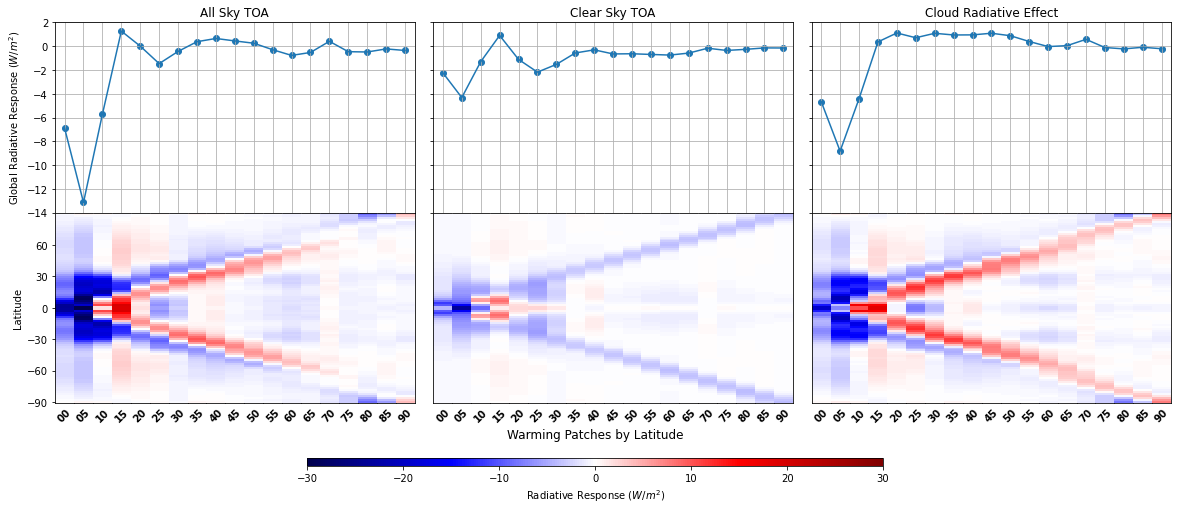

In [35]:
plt.rcParams['figure.figsize'] = [20,7]
fig = plt.figure()

gs = GridSpec(2, 59)
gs.update(wspace=0)

ytickrange = [2,0,-2,-4,-6,-8,-10,-12,-14]
ymin=-14
ymax=2

ax1 = fig.add_subplot(gs[0,:19])
ax1.scatter(lats, mean_list_toa)
ax1.plot(lats, mean_list_toa)
ax1.set_ylabel(r'Global Radiative Response ($W/m^2$)')
ax1.set_xticks(lats, minor=False)
ax1.set_yticks(ytickrange, minor=False)
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-2.5,92.5)
ax1.set_ylim(ymin,ymax)
ax1.grid(True)
ax1.set_title('All Sky TOA')
for tick in ax1.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

for num in range(0,19):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax,xdim_toa[num], mesh_toa[num], latlabels[num])

axempty1 = fig.add_subplot(gs[0,19])
axempty1.remove()

ax2 = fig.add_subplot(gs[0,20:39])    
ax2.scatter(lats, mean_list_clr)
ax2.plot(lats, mean_list_clr)
ax2.set_xticks(lats, minor=False)
ax2.set_yticks(ytickrange, minor=False)
ax2.yaxis.grid(True, which='major')
ax2.xaxis.grid(True, which='major')
ax2.set_xlim(-2.5, 92.5)
ax2.set_ylim(ymin,ymax)
ax2.grid(True)
ax2.set_title('Clear Sky TOA')
for tick in ax2.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
for num in range(20,39):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax, xdimclr[num-20], clrmesh[num-20], latlabels[num-20])
    
axempty2 = fig.add_subplot(gs[0,39])
axempty2.remove()

ax3 = fig.add_subplot(gs[0,40:])
ax3.scatter(lats, mean_list_cre)
ax3.plot(lats, mean_list_cre)
ax3.set_xticks(lats, minor=False)
ax3.set_yticks(ytickrange, minor=False)
ax3.yaxis.grid(True, which='major')
ax3.xaxis.grid(True, which='major')
ax3.set_xlim(-2.5, 92.5)
ax3.set_ylim(ymin,ymax)
ax3.grid(True)
ax3.set_title('Cloud Radiative Effect')
for tick in ax3.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax3.yaxis.get_major_ticks():
#     tick.tick1line.set_visible(False)
#     tick.tick2line.set_visible(False)
     tick.label1.set_visible(False)
     tick.label2.set_visible(False)    
    
for num in range(40,59):
    ax = fig.add_subplot(gs[1,num])
    mappable = mesh_plot(ax, xdim_cre[num-40], cremesh[num-40], latlabels[num-40])

fig.supxlabel('Warming Patches by Latitude', y=0.05)
cax = fig.add_axes([0.3,0,0.4,0.015])
plt.subplots_adjust(wspace=0, hspace=0.0)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')
plt.show()

# Shortwave Only

In [36]:
# All Sky

#Control
SWcontrol_Rw = data_control.FSNT.mean('lon')
SWcontrol_Rw.load()

SWtoa_00 = data_00.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_00.load()

SWtoa_05_n = data_05_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_05_s = SWtoa_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
SWtoa_05 = SWtoa_05_n + SWtoa_05_s
SWtoa_05.load()

SWtoa_10_n = data_10_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_10_s = SWtoa_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))
SWtoa_10 = SWtoa_10_n + SWtoa_10_s
SWtoa_10.load()

SWtoa_15_n = data_15_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_15_s = SWtoa_15_n.assign_coords(lat=list(reversed(data_15_n.lat)))
SWtoa_15 = SWtoa_15_n + SWtoa_15_s
SWtoa_15.load()

SWtoa_20_n = data_20_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_20_s = SWtoa_20_n.assign_coords(lat=list(reversed(data_20_n.lat)))
SWtoa_20 = SWtoa_20_n + SWtoa_20_s
SWtoa_20.load()

SWtoa_25_n = data_25_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_25_s = SWtoa_25_n.assign_coords(lat=list(reversed(data_25_n.lat)))
SWtoa_25 = SWtoa_25_n + SWtoa_25_s
SWtoa_25.load()

SWtoa_30_n = data_30_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_30_s = SWtoa_30_n.assign_coords(lat=list(reversed(data_30_n.lat)))
SWtoa_30 = SWtoa_30_n + SWtoa_30_s
SWtoa_30.load()

SWtoa_35_n = data_35_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_35_s = SWtoa_35_n.assign_coords(lat=list(reversed(data_35_n.lat)))
SWtoa_35 = SWtoa_35_n + SWtoa_35_s
SWtoa_35.load()

SWtoa_40_n = data_40_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_40_s = SWtoa_40_n.assign_coords(lat=list(reversed(data_40_n.lat)))
SWtoa_40 = SWtoa_40_n + SWtoa_40_s
SWtoa_40.load()

SWtoa_45_n = data_45_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_45_s = SWtoa_45_n.assign_coords(lat=list(reversed(data_45_n.lat)))
SWtoa_45 = SWtoa_45_n + SWtoa_45_s
SWtoa_45.load()

SWtoa_50_n = data_50_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_50_s = SWtoa_50_n.assign_coords(lat=list(reversed(data_50_n.lat)))
SWtoa_50 = SWtoa_50_n + SWtoa_50_s
SWtoa_50.load()

SWtoa_55_n = data_55_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_55_s = SWtoa_55_n.assign_coords(lat=list(reversed(data_55_n.lat)))
SWtoa_55 = SWtoa_55_n + SWtoa_55_s
SWtoa_55.load()

SWtoa_60_n = data_60_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_60_s = SWtoa_60_n.assign_coords(lat=list(reversed(data_60_n.lat)))
SWtoa_60 = SWtoa_60_n + SWtoa_60_s
SWtoa_60.load()

SWtoa_65_n = data_65_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_65_s = SWtoa_65_n.assign_coords(lat=list(reversed(data_65_n.lat)))
SWtoa_65 = SWtoa_65_n + SWtoa_65_s
SWtoa_65.load()

SWtoa_70_n = data_70_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_70_s = SWtoa_70_n.assign_coords(lat=list(reversed(data_70_n.lat)))
SWtoa_70 = SWtoa_70_n + SWtoa_70_s
SWtoa_70.load()

SWtoa_75_n = data_75_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_75_s = SWtoa_75_n.assign_coords(lat=list(reversed(data_75_n.lat)))
SWtoa_75 = SWtoa_75_n + SWtoa_75_s
SWtoa_75.load()

SWtoa_80_n = data_80_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_80_s = SWtoa_80_n.assign_coords(lat=list(reversed(data_80_n.lat)))
SWtoa_80 = SWtoa_80_n + SWtoa_80_s
SWtoa_80.load()

SWtoa_85_n = data_85_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_85_s = SWtoa_85_n.assign_coords(lat=list(reversed(data_85_n.lat)))
SWtoa_85 = SWtoa_85_n + SWtoa_85_s
SWtoa_85.load()

SWtoa_90_n = data_pole_n.FSNT.mean('lon') - SWcontrol_Rw
SWtoa_90_s = SWtoa_90_n.assign_coords(lat=list(reversed(data_pole_n.lat)))
SWtoa_90 = SWtoa_90_n + SWtoa_90_s
SWtoa_90.load()

<xarray.DataArray 'FSNT' (lat: 96)>
array([-0.00681573, -0.15461588, -0.1885395 ,  0.04150963,  0.50333977,
        0.8460541 ,  0.6406746 ,  0.39902115,  0.26441956,  0.2412796 ,
        0.27017975,  0.31358337,  0.30088043,  0.21723175,  0.15169525,
        0.16125488,  0.16908264,  0.16896057,  0.28390503,  0.3898468 ,
        0.47477722,  0.5574188 ,  0.74235535,  0.6706238 ,  0.38711548,
        0.34095764, -0.02038574, -0.15960693, -0.35809326, -0.35887146,
       -0.69932556, -1.225174  , -1.2177124 , -1.3074951 , -1.0320435 ,
       -0.88027954, -0.55178833, -0.24682617, -0.22280884, -0.29541016,
       -0.21240234, -0.06469727,  0.14181519,  0.33831787,  0.47595215,
        0.31063843, -1.0613403 , -1.489563  , -1.489563  , -1.0613403 ,
        0.31063843,  0.47595215,  0.33831787,  0.14181519, -0.06469727,
       -0.21240234, -0.29541016, -0.22280884, -0.24682617, -0.55178833,
       -0.88027954, -1.0320435 , -1.3074951 , -1.2177124 , -1.225174  ,
       -0.69932556, -0.35887146, -0.35809326, -0.15960693, -0.02038574,
        0.34095764,  0.38711548,  0.6706238 ,  0.74235535,  0.5574188 ,
        0.47477722,  0.3898468 ,  0.28390503,  0.16896057,  0.16908264,
        0.16125488,  0.15169525,  0.21723175,  0.30088043,  0.31358337,
        0.27017975,  0.2412796 ,  0.26441956,  0.39902115,  0.6406746 ,
        0.8460541 ,  0.50333977,  0.04150963, -0.1885395 , -0.15461588,
       -0.00681573], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [ ]:
x_dim_mesh = np.linspace(0,1,96)

xdim_00, toamesh_00 = np.meshgrid(x_dim_mesh, SWtoa_00)
xdim_05, toamesh_05 = np.meshgrid(x_dim_mesh, SWtoa_05)
xdim_10, toamesh_10 = np.meshgrid(x_dim_mesh, SWtoa_10)
xdim_15, toamesh_15 = np.meshgrid(x_dim_mesh, SWtoa_15)
xdim_20, toamesh_20 = np.meshgrid(x_dim_mesh, SWtoa_20)
xdim_25, toamesh_25 = np.meshgrid(x_dim_mesh, SWtoa_25)
xdim_30, toamesh_30 = np.meshgrid(x_dim_mesh, SWtoa_30)
xdim_35, toamesh_35 = np.meshgrid(x_dim_mesh, SWtoa_35)
xdim_40, toamesh_40 = np.meshgrid(x_dim_mesh, SWtoa_40)
xdim_45, toamesh_45 = np.meshgrid(x_dim_mesh, SWtoa_45)
xdim_50, toamesh_50 = np.meshgrid(x_dim_mesh, SWtoa_50)
xdim_55, toamesh_55 = np.meshgrid(x_dim_mesh, SWtoa_55)
xdim_60, toamesh_60 = np.meshgrid(x_dim_mesh, SWtoa_60)
xdim_65, toamesh_65 = np.meshgrid(x_dim_mesh, SWtoa_65)
xdim_70, toamesh_70 = np.meshgrid(x_dim_mesh, SWtoa_70)
xdim_75, toamesh_75 = np.meshgrid(x_dim_mesh, SWtoa_75)
xdim_80, toamesh_80 = np.meshgrid(x_dim_mesh, SWtoa_80)
xdim_85, toamesh_85 = np.meshgrid(x_dim_mesh, SWtoa_85)
xdim_90, toamesh_90 = np.meshgrid(x_dim_mesh, SWtoa_90)